In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

In [3]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(10))
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

In [4]:
y_test.shape

(10000, 10)

In [7]:
model = Sequential()
    
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))    
model.add(Conv2D(32, (3, 3), activation='relu'))    
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3686912   
__________

In [8]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics = ['accuracy'])

In [9]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True) 

In [10]:
datagen.fit(x_train)

In [11]:
BATCH_SIZE = 128

In [21]:
model_details = model.fit_generator(datagen.flow(x_train, y_train, batch_size = BATCH_SIZE),
                    steps_per_epoch = len(x_train) // BATCH_SIZE, 
                    epochs = 10, 
                    validation_data= (x_test, y_test),
                    verbose=1)

Epoch 1/10
390/390 [==============================] - 304s 780ms/step - loss: 1.3597 - acc: 0.5166 - val_loss: 1.5045 - val_acc: 0.5171
Epoch 2/10
390/390 [==============================] - 307s 787ms/step - loss: 1.3361 - acc: 0.5228 - val_loss: 1.1582 - val_acc: 0.5972
Epoch 3/10
390/390 [==============================] - 312s 800ms/step - loss: 1.3266 - acc: 0.5267 - val_loss: 1.3343 - val_acc: 0.5593
Epoch 4/10
390/390 [==============================] - 298s 764ms/step - loss: 1.3161 - acc: 0.5324 - val_loss: 1.3815 - val_acc: 0.5291
Epoch 5/10
390/390 [==============================] - 316s 810ms/step - loss: 1.3061 - acc: 0.5338 - val_loss: 1.2502 - val_acc: 0.5584
Epoch 6/10
390/390 [==============================] - 368s 943ms/step - loss: 1.2927 - acc: 0.5415 - val_loss: 1.3076 - val_acc: 0.5527
Epoch 7/10
390/390 [==============================] - 571s 1s/step - loss: 1.2789 - acc: 0.5473 - val_loss: 1.0718 - val_acc: 0.6222
Epoch 8/10
390/390 [==============================]

In [22]:
score = model.evaluate(x_test, y_test)
print("Accuracy: {0:.2f}%".format(score[1]*100))

10000/10000 [==============================] - 17s 2ms/step
Accuracy: 60.35%


In [23]:
y_pred = model.predict(x_test)

In [24]:
correct_indices = np.nonzero(np.argmax(y_pred,axis=1) == np.argmax(y_test,axis=1))[0]
incorrect_indices = np.nonzero(np.argmax(y_pred,axis=1) != np.argmax(y_test,axis=1))[0]

In [25]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

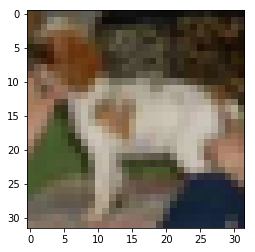

Prediction: horse


In [28]:
image = 2
plt.imshow(x_test[incorrect_indices[image]].reshape(32,32,3))
plt.show()
print("Prediction: {0}".format(labels[np.argmax(y_pred[incorrect_indices[image]])]))

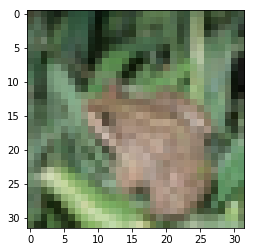

Prediction: frog


In [27]:
image = 2
plt.imshow(x_test[correct_indices[image]].reshape(32,32,3))
plt.show()
print("Prediction: {0}".format(labels[np.argmax(y_pred[correct_indices[image]])]))